# 4. 좋은 훈련 데이터셋 만들기:파이토치

데이터의 품질과 데이터에 담겨있는 유용한 정보의 양은 **머신러닝** 알고리즘을 얼마나 잘 학습 시킬 수 있는지 결정하는 중요한 요소이다. 이 노트북에서는 데이터셋을 다루는 방법을 배우고, 머신러닝 알고리즘에 데이터를 효과적으로 제공할 수 있는 방법을 배운다. ((배워보자 ...))

* 누락된 데이터 다루기
* 범주형 데이터 다루기
* 데이터셋을 훈련 데이터셋과 테스트 데이터셋으로 나누기
* 특성 스케일 맞추기
* 유용한 특성 선택하기
* 랜덤 포레스트 특성 중요도 사용
...

## 누락된 데이터 다루기

누락된 데이터는 다루기 까다로운 문제이다. 누락된 데이터가 있는 경우에는 해당 데이터를 제거하거나, 채워넣어야 한다. 누락된 데이터를 제거하는 것은 간단하지만, 데이터가 많은 경우에는 데이터를 제거할 수 없다. 누락된 데이터를 채워넣는 방법은 여러가지가 있는데, 평균값, 중간값, 최빈값 등으로 채워넣을 수 있다.

NaN 값등 누락된 데이터를 다루기 위해서는 `SimpleImputer`를 사용할 수 있다. `SimpleImputer`는 누락된 데이터를 채워넣는데 사용된다. `SimpleImputer`는 누락된 데이터를 특정 값으로 채워넣는데 사용된다. `SimpleImputer`는 `strategy` 매개변수를 사용하여 누락된 데이터를 채워넣는 방법을 지정할 수 있다. `strategy` 매개변수의 값으로는 `mean`, `median`, `most_frequent`, `constant` 등이 있다.

### 4.1.1. 테이블 형태 데이터에서 누락된 값 식별하기

In [32]:
import pandas as pd

from io import StringIO

csv_data = \
  """A,B,C,D
  1.0,2.0,3.0,4.0
  5.0,6.0,,8.0
  10.0,11.0,12.0
  """
  
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


누락된 값은`NaN`으로 표시된다. `NaN`은 `numpy` 모듈에 정의되어 있다.

In [33]:
# 각 열마다 누락된 값의 개수를 출력
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

### 4.1.2. 누락된 값이 있는 훈련 샘플이나 특성 제거하기

누락된 값이 있는 훈련 샘플이나 특성을 제거하는 방법은 간단하다. `dropna` 메서드를 사용하여 누락된 값이 있는 훈련 샘플이나 특성을 제거할 수 있다.

In [34]:
df.dropna(axis=0) # 행 삭제

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [35]:
df.dropna(axis=1) # 열 삭제

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [36]:
# 모든 열이 NaN인 행만 삭제
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [37]:
# NaN이 아닌 값이 네 개보다 작은 행 삭제
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [38]:
# 특정 열에 NaN이 있는 행만 삭제
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


4.1.3. 누락된 값 대체하기

누락된 값을 삭제하지 못할 때 대체하는 방법이 있다. `SimpleImputer`를 사용하여 누락된 값을 대체할 수 있다. `SimpleImputer`는 누락된 값을 대체하는데 사용된다. `SimpleImputer`는 `strategy` 매개변수를 사용하여 누락된 값을 대체하는 방법을 지정할 수 있다. `strategy` 매개변수의 값으로는 `mean`, `median`, `most_frequent`, `constant` 등이 있다.

In [39]:
import numpy as np

from sklearn.impute import SimpleImputer

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
print(pd.DataFrame(imputed_data))
print(df)

      0     1     2    3
0   1.0   2.0   3.0  4.0
1   5.0   6.0   7.5  8.0
2  10.0  11.0  12.0  6.0
      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN


* [C:1]은 평균값 7.5로 누락된 값을 대체했다.
* [D:2]는 평균값 6으로 누락된 값을 대체했다.

`startegy` 매개변수를 설정할 수 있는 다름 값으로는 `median`, `most_frequent`, `constant` 등이 있다.

* `median`: 중간값으로 누락된 값을 대체한다.
* `most_frequent`: 가장 많이 나타난 값으로 대체한다.
* `constant`: `fill_value` 매개변수에 지정된 값으로 누락된 값을 대체한다.

### 4.1.4. 사이킷런의 추정기 API

`SimpleImputer`는 사이킷런의 변환기이다. 변환기는 데이터를 변환하는 추정기를 말한다. 변환기는 `fit` 메서드와 `transform` 메서드를 가지고 있다. `fit` 메서드는 훈련 데이터를 사용하여 변환 매개변수를 학습하고, `transform` 메서드는 학습한 매개변수를 사용하여 데이터를 변환한다. `SimpleImputer`는 `fit` 메서드를 사용하여 훈련 데이터의 평균값, 중간값, 최빈값 등을 계산하고, `transform` 메서드를 사용하여 누락된 값을 대체한다.

## 4.2. 범주형 데이터 다루기

범주형 데이터를 다룰 때,

* 순서가 있는 것과 없는 것을 구분해야한다.
  * 순서가 있는 특성은 정렬하거나 차례대로 놓을 수 있는 범주형 특성으로 생각할 수 있다.
  * 반대로 순서가 없는 특성은 차례를 부여할 수 없다.

### 4.2.1. 판다스에서 범주형 데이터 다루기

In [40]:
import pandas as pd

df = pd.DataFrame([
  ['green', 'M', 10.1, 'class2'],
  ['red', 'L', 13.5, 'class1'],
  ['blue', 'XL', 15.3, 'class2']
], columns=['color', 'size', 'price', 'classlabel'])

df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


* `color`는 순서가 없는 특성이다.
* `size`는 순서가 있는 특성이다.
* `price`는 수치형 특성이다.
* `classlabel`는 라벨?

`size`의 순서를 자동으로 인식시키키 웨해서 매핑 함수를 만들어야 한다.

수식$XL = L + 1 = M + 2$을 가정한다고 하자.

In [41]:
size_mapping = {
  'XL': 3,
  'L': 2,
  'M': 1
}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [42]:
# 거꾸로 매핑
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

### 4.2.3. 클래스 레이블 인코딩

In [43]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [44]:
# 매핑 딕셔너리를 사용하여 클래스 레이블을 정수로 변환
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [45]:
# 거꾸로 매핑
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [46]:
# 사이킷런의 LabelEncoder를 사용하여 클래스 레이블을 정수로 변환
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

* `fit_transform` 메서드는 `fit` 메서드와 `transform` 메서드를 합쳐놓은 단축 메서드 이다.
* `inverse_transform` 메서드는 `transform` 메서드로 변환된 데이터를 원래의 값으로 되돌린다.

In [47]:
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

### 4.2.4. 순서가 없는 특성에 원-핫 인코딩 적용하기

`OneHotEncoder`는 순서가 없는 특성을 원-핫 인코딩하는데 사용된다. `OneHotEncoder`는 `fit` 메서드와 `transform` 메서드를 가지고 있다. `fit` 메서드는 훈련 데이터를 사용하여 변환 매개변수를 학습하고, `transform` 메서드는 학습한 매개변수를 사용하여 데이터를 변환한다.


In [48]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

`color`는 순서가 없는데 `blue:0`, `green:1`, `red:2`로 매핑되었다. 이대로 분류기에 넣으면 분류기는 `red`가 `green`보다 `blue`보다 크다고 생각할 것이다. 이러한 문제를 해결하기 위해서 `OneHotEncoder`를 사용하여 순서가 없는 특성을 원-핫 인코딩할 수 있다.

In [49]:
from sklearn.preprocessing import OneHotEncoder
X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

배열의 다른 두 열을 수정하지 않기 위해 `OneHotEncoder`를 하나의 열 (X[:, 0])에만 적용했다. `OneHotEncoder`는 기본적으로 희소 행렬을 반환한다. `toarray` 메서드를 사용하여 밀집 배열로 변환할 수 있다. 여러 개의 특성이 있는 배열에서 특정 열만 반환 하려면 `ColumnTransformer`를 사용할 수 있다.
이 클래스는 (name, transformer, columns) 튜플의 리스트를 입력으로 받아서 각 열에 다른 변환을 적용할 수 있다.

In [50]:
from sklearn.compose import ColumnTransformer
X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([
  ('onehot', OneHotEncoder(dtype=int), [0]), # 0번째 열에 대해 OneHotEncoder 적용
  ('nothing', 'passthrough', [1, 2]) # 1, 2번째 열은 그대로 유지
])

c_transf.fit_transform(X)

array([[0, 1, 0, 1, 10.1],
       [0, 0, 1, 2, 13.5],
       [1, 0, 0, 3, 15.3]], dtype=object)

*원-핫 인코딩된 데이터셋을 사용할 때* 다중 공선성(multicollinearity) 문제가 발생할 수 있다. 다중 공선상 이란 두 개 이상의 특성이 서로 상관관계가 있을 때 발생하는 문제이다. 다중 공선성 문제를 해결하기 위해서 원-핫 인코딩된 특성 중 하나를 삭제한다. `OneHotEncoder`는 `drop` 매개변수를 사용하여 원-핫 인코딩된 특성 중 하나를 삭제할 수 있다. `drop` 매개변수의 값으로는 `first`, `if_binary` 등이 있다.

`get_dummies`를 사용할 때 `drop_first` 매개변수를 `True`로 지정하여 첫번째 열을 삭제할 수 있다.


In [51]:
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True, dtype=int)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


`OneHotEncoder`에서 중복열을 삭제하려면 `drop='first'`와 `categories='auto'`를 사용한다.

In [52]:
color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([
  ('onehot', color_ohe, [0]),
  ('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X)

array([[1.0, 0.0, 1, 10.1],
       [0.0, 1.0, 2, 13.5],
       [0.0, 0.0, 3, 15.3]], dtype=object)

**순서가 있는 특성 인코딩하기**

순서가 있는 특성의 범주 사이에서 수치적 크기에 대해 확신할 수 없거나, 두 범주 사이의 순서를 정의할 수 없다면 임계 값을 사용하여 0/1로 인코딩 할 수 있다.

In [53]:
import pandas as pd

df = pd.DataFrame([
  ['green', 'M', 10.1, 'class2'],
  ['red', 'L', 13.5, 'class1'],
  ['blue', 'XL', 15.3, 'class2']
], columns=['color', 'size', 'price', 'classlabel'])

df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [54]:
df['x > M'] = df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)
del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


## 4.3. 데이터셋을 훈련 데이터셋과 테스트 데이터셋으로 나누기

머신러닝 모델을 훈련시키고 평가하기 위해서는 데이터셋을 훈련 데이터셋과 테스트 데이터셋으로 나누어야 한다. 훈련 데이터셋은 모델을 훈련시키는데 사용되고, 테스트 데이터셋은 모델을 평가하는데 사용된다.


In [55]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [56]:
print(f"Shape: {df_wine.shape}")

df_wine.head()

Shape: (178, 14)


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


/home/asanobm/miniforge3/envs/ai/lib/python3.11/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


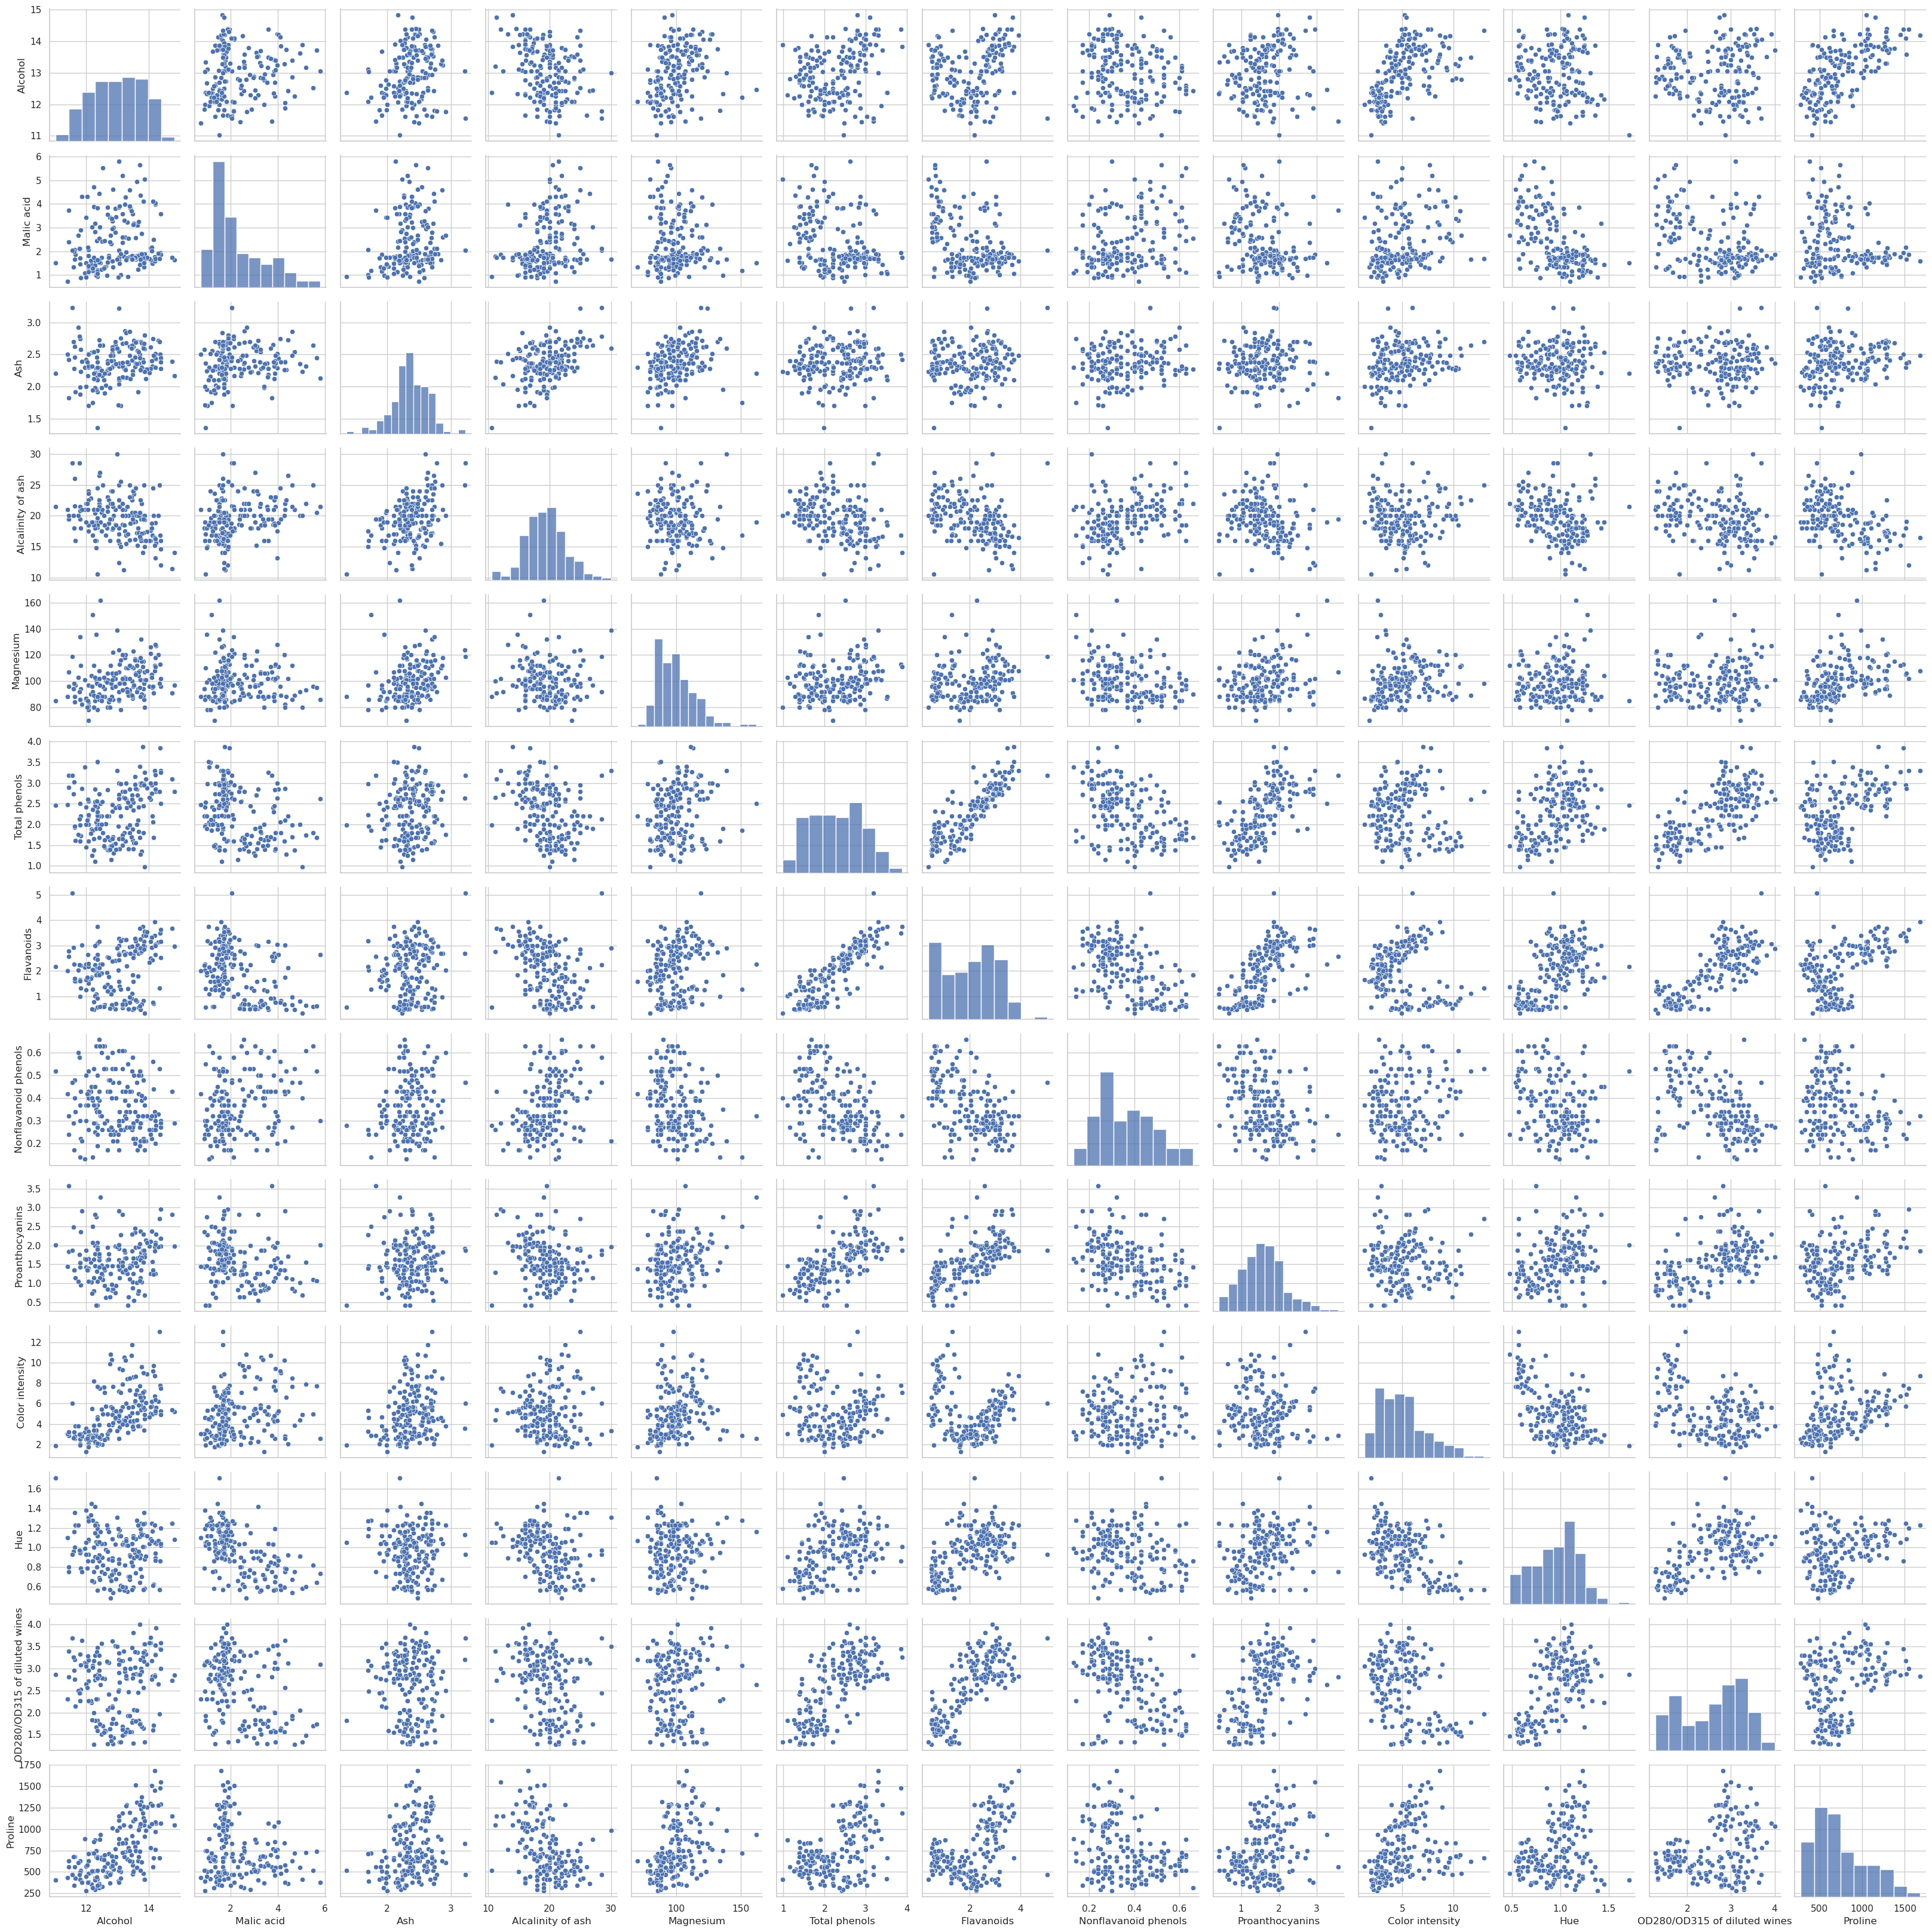

In [57]:
## Dataset to multiful graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
sns.pairplot(df_wine[cols], size=2.5)
plt.tight_layout()
plt.show()

# import numpy as np
# cm = np.corrcoef(df_wine[cols].values.T)
# sns.set(font_scale=1.5)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)
# plt.show()

In [58]:
# show web site by webbrowser
# import webbrowser
# webbrowser.open('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names')

사이킷런의 `model_selection` 모듈에 있는 `train_test_split` 함수를 사용하면 가장 간편하게 데이터셋을 랜덤한 훈련 데이터셋과 테스트 데이터셋으로 나눌 수 있다.

In [59]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


* 먼저 인텍스 1에서 인덱트 13까지 특성을 넘파이 배열로 변환하여 `X`에 저장하고, 첫번째 열의 클래스 레이블은 `y`에 저장한다. 
* `train_test_split` 함수에 `X`와 `y`를 전달하여 랜덤하게 훈련 데이터셋과 테스트 데이터셋으로 나눈다.
* `test_size`를 0.3으로 지정하여 전체 데이터셋의 30%가 `X_test`와 `y_test`에 할당된다.
* 나머지 70%는 `X_train`과 `y_train`에 할당된다.
* `stratify` 매개변수에 클래스 레이블 배열 `y`를 전달하면 훈련 데이터셋과 테스트 데이터셋에 있는 클래스 비율이 원본 데이터 셋과 동일하게 유지된다.


In [60]:
# view the test data

print(f"X_train: {X_train.shape}")

# show test data graph
import numpy as np
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

print(f"X_train_std: {X_train_std.shape}")
print(f"X_test_std: {X_test_std.shape}")

X_train: (124, 13)
X_train_std: (124, 13)
X_test_std: (54, 13)


## 4.4. 특성 스케일 맞추기

**특성 스케일링이란?**

특성 스케일링에 대한 자세한 내용이 서적에 나와있지 않아서 다른 자료를 참고하였다. (아래 내용은 참고 자료를 요약한 것이다.)

>Machine learning is like making a mixed fruit juice. If we want to get the best-mixed juice, we need to mix all fruits not by their size but based on their right proportion. We need to remember apples and strawberries are not the same unless we make them similar in some context to compare their attribute. Similarly, in many machine learning algorithms, to bring all features in the same standing, we need to do scaling so that one significant number doesn’t impact the model just because of its large magnitude.

> 머신러닝은 혼합 과일 주스를 만드는 것과 같습니다. 가장 잘 섞인 주스를 얻으려면 모든 과일을 크기에 따라 섞는 것이 아니라 올바른 비율에 따라 섞어야 합니다. 우리는 사과와 딸기의 속성을 비교하기 위해 어떤 맥락에서 유사하게 만들지 않는 한 동일하지 않다는 것을 기억해야 합니다. 마찬가지로, 많은 기계 학습 알고리즘에서 모든 기능을 동일한 위치로 가져오려면 하나의 중요한 숫자가 크기가 크다고 해서 모델에 영향을 미치지 않도록 스케일링을 수행해야 합니다.

정리하자면 특성 스케일링은 모든 특성을 동일한 스케일로 맞추는 것이다. 특성 스케일링을 하지 않으면 특성의 값이 큰 경우에 모델이 특성의 값이 작은 특성에 덜 민감하게 반응할 수 있다. 특성 스케일링을 하면 모든 특성이 동일한 스케일로 맞추어져 모델이 특성의 값이 큰 특성에 덜 민감하게 반응하게 된다.

[All about Feature Scaling: Baijayanta Roy](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)


**특성 스케일링 방법**
특성 스케일을 맞추는 대표적인 방법으로는 *표준화*와 *정규화*가 있다.

정규화는 특성 스케일을 [0, 1] 범위에 맞추는 것이다. 최소-최대 스케일 변환으로도 알려져 있다. 정규화는 다음과 같은 수식으로 계산된다.

$$x^{(i)}_{norm} = \frac{x^{(i)} - x_{min}}{x_{max} - x_{min}}$$

$x^{(i)}$는 특성의 샘플이고, $x_{min}$은 특성의 최솟값, $x_{max}$는 특성의 최댓값이다.

**사이킷런의 예**
```python
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
```

최소-최대 스케일 변환을 통한 정규화는 정해진 범위의 값이 필요할 때 유용하다.

표준화는 많은 머신러닝 알고리즘, 특히 경사 하강법 같은 최적화 알고리즘에서 많이 사용한다.

로지스틱 회귀와 SVM같은 여러 선형 모델은 가중치를 0 또는 0에 가까운 작은 난수로 초기화 한다. 표준화를 사용하면 특성의 평균을 0에 맞추고 표준 편차를 1로 만들어 가중치를 더 쉽게 학습할 수 있도록 한다. 하지만 표준화가 분포 모양을 바꾸지 않으며 정규 분포가 아닌 데이터를 정규 분포로 바꾸지는 않는다.

$$x^{(i)}_{std} = \frac{x^{(i)} - \mu_x}{\sigma_x}$$

$mu_x$는 특성의 평균이고, $\sigma_x$는 특성의 표준편차이다.

In [63]:
# 표준화와 정규화

ex = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

print(f"표준화: {(ex - ex.mean()) / ex.std()}")
print(f"정규화: {(ex - ex.min()) / (ex.max() - ex.min())}")

표준화: [-1.5666989  -1.21854359 -0.87038828 -0.52223297 -0.17407766  0.17407766
  0.52223297  0.87038828  1.21854359  1.5666989 ]
정규화: [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


In [64]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train) # fit은 한번만 호출
X_test_std = stdsc.transform(X_test)

사이킷런에서 특성 스케일을 조정하는 다른 방법은 `RobustScaler`이다. 이상치가 많이 포함된 작은 데이터셋을 다룰 때 유용하다.
데이터셋에 적용된 머신 러닝 알고리즘이 과대적합되기 쉽다면 `RobustScaler`를 사용하는 것이 좋다. `RobustScaler`는 특성 열마다 독립적으로 작용하며 중간 값을 뺀 다음 데이터셋의 1사분위수와 3사분위수를 사용하여 데이터셋의 스케일을 조정한다. 이는 극단치와 이상치에 영향을 덜 받게 된다.

`RobustScaler`는 중간값$(q_{2})$을 빼고 1사분위수$(q_{1})$와 3사분위수$(q_{3})$의 차이로 나누어 계산된다.

$$x^{(i)}_{robust} = \frac{x^{(i)} - q_{2}}{q_{3} - q_{1}}$$

In [79]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
X_train_robust = rbs.fit_transform(X_train)
X_test_robust = rbs.transform(X_test)

print((ex - np.percentile(ex, 50)) / (np.percentile(ex, 75) - np.percentile(ex, 25)))


[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]


## 4.5. 유용한 특성 선택

모델이 테스트 데이터셋보다 훈련 데이터셋에서 성능이 높다면 `과대적합`에 대한 신호일 수 있다.

**일반화 오차를 감소시키는 방법**

* 더 많은 훈련 데이터를 모으기
* 규제를 통해 복잡도를 줄이기
* 파라미터 개수가 적은 간단한 모델을 선택하기
* 데이터 차원을 줄이기


### 4.5.1. 모델 복잡도 제한을 위한 L1 규제와 L2 규제

규제는 모델의 복잡도를 제한하는 방법이다. 규제를 사용하면 모델이 훈련 데이터셋에 과대적합되는 것을 방지할 수 있다.

**L1 규제 방법**
$$L1: ||w||_{1} = \sum_{j=1}^{m}|w_j|$$

**L2 규제 방법**
$$L2: ||w||_{2}^{2} = \sum_{j=1}^{m}w_j^2$$

`RobustScaler`는 `StandardScaler`와 사용법이 동일 하다.


### 4.5.2. L2 규제의 기하학적 해석

L2 규제는 손실 함수에 패널티 항(penalty term)을 추가한다. 규제가 없는 손실 함수로 훈련한 모델에 비해 가중치 값을 작게 만들어 모델의 복잡도를 줄인다. 가중치를 작게 만들어 모델의 복잡도를 줄이는 것은 모델의 일반화 오차를 줄이는데 도움이 된다.

아달린에서 사용했던 제곱 오차합(SSE)을 손실 함수로 생각했을 때, 이 함수는 정답 레이블 $y$와 예측 레이블 $\hat{y}$ 사이의 거리를 제곱하고 훈련 세트에 있는 전체 샘플 개수 N으로 나누어 평균을 계산한다.

평균 제곱 오차 손실 함수 최소화

$$\frac{1}{N}\sum_{i=1}^{N}(y^{(i)}-\hat y^{(i)})^2$$



### 4.5.3. L1 규제를 사용한 희소성

L1 페널티는 가중치 절댓값의 합이기 때문에 다이아몬드 모양의 제한 범위를 만든다. 

L1 규제를 사용하면 가중치 벡터의 일부가 0이 되어 특성 선택이 자동으로 이루어진다. 이러한 특성 선택은 모델을 더 간단하게 만들어 모델의 일반화 오차를 줄이는데 도움이 된다.

사이킷런에서 L1 규제를 사용하려면 `penalty` 매개변수를 `l1`으로 지정하여 희소한 모델을 만든다.


In [ ]:
from sklearn.linear_model import LogisticRegression